<a href="https://colab.research.google.com/github/Priya-19042003/Keylogger-Detection/blob/main/Keylogger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Keylogger_Detection.csv')
df.head(5)

<ipython-input-3-42f6e3a22a71>:1: DtypeWarning: Columns (48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Keylogger_Detection.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451.0,52.6.25.230,443.0,6.0,04/08/2017 05:12:36,12140931.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892.0,172.217.3.99,443.0,6.0,04/08/2017 07:55:51,418882.0,102.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443.0,10.42.0.151,50750.0,6.0,04/08/2017 08:48:19,45.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025.0,10.42.0.1,53.0,17.0,04/08/2017 05:54:10,541699.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602.0,123.129.244.226,443.0,6.0,04/08/2017 08:44:25,7310795.0,3.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [4]:
from sklearn.preprocessing import LabelEncoder

df[' Destination IP'] = LabelEncoder().fit_transform(df[' Destination IP'])
df[' Source IP'] = LabelEncoder().fit_transform(df[' Destination IP'])
df['Class'] = LabelEncoder().fit_transform(df['Class'])

df = df.select_dtypes(include=[np.number])
# Drop 'Unnamed: 0' only if it exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

df = df.dropna()
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,2307,34451.0,2307,443.0,6.0,12140931.0,9.0,6.0,334.0,3664.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,929,53892.0,929,443.0,6.0,418882.0,102.0,203.0,829.0,279509.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,10,443.0,10,50750.0,6.0,45.0,2.0,0.0,55.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,23025.0,9,53.0,17.0,541699.0,1.0,1.0,39.0,225.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,393,52602.0,393,443.0,6.0,7310795.0,3.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
feature_names = df.columns

target = ['Class']
features = [c for c in df.columns if c != "Class"]
# Fit the scaler to the data and transform the data
df[features] = scaler.fit_transform(df[features])

df.head(10)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,1.525004,-0.210447,1.525004,-0.368579,-0.468869,0.042412,-0.004811,-0.036722,-0.013233,-0.038629,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
1,0.017335,0.828488,0.017335,-0.368579,-0.468869,-0.465677,0.945481,0.575336,-0.004001,0.556643,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
2,-0.988143,-2.027850,-0.988143,2.839491,-0.468869,-0.483832,-0.076338,-0.055364,-0.018437,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
3,-0.989237,-0.821058,-0.989237,-0.393449,2.036974,-0.460354,-0.086556,-0.052257,-0.018736,-0.046050,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
4,-0.569102,0.759550,-0.569102,-0.368579,-0.468869,-0.166949,-0.066120,-0.055364,-0.019463,-0.046536,...,0.004135,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
5,0.126745,1.027981,0.126745,-0.368579,-0.468869,-0.483499,-0.076338,-0.055364,-0.019463,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,1
6,-0.987049,-2.027850,-0.987049,2.019602,-0.468869,-0.483735,-0.086556,-0.052257,-0.019463,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,1
7,-0.037370,0.318132,-0.037370,-0.368579,-0.468869,2.063657,-0.045683,-0.036722,0.008440,-0.043994,...,0.004137,-0.054223,-0.063066,-0.066458,-0.036581,3.583540,-0.121636,3.366029,3.703867,1
8,1.302902,0.486095,1.302902,-0.368579,-0.468869,0.324113,-0.035465,-0.042936,-0.008869,-0.046208,...,0.004135,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
9,1.407936,0.837520,1.407936,-0.368579,-0.468869,-0.481683,-0.086556,-0.052257,-0.019463,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0


In [6]:
features = [c for c in df.columns if c != "Class"]

# Assuming 'data' is your DataFrame containing the features
correlation_matrix = df[features].corr().abs()

# Create a mask to ignore diagonal and lower triangular values
mask = (correlation_matrix
        .where(np.triu(np.ones(correlation_matrix.shape), k=1)
               .astype(bool)))

# Find features with correlation greater than a threshold (e.g., 0.7)
high_corr_features = [column for column in mask.columns if any(mask[column] > 0.7)]

# Drop the highly correlated features
df = df.drop(high_corr_features, axis=1)

In [7]:
features = [c for c in df.columns if c != "Class"]

df.head()

,Source IP,Source Port,Protocol,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,...,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_backward,Active Mean,Active Std,Idle Std,Class
0,1.525004,-0.210447,-0.468869,0.042412,-0.004811,-0.013233,-0.021233,-0.212204,1.992624,-0.356089,...,0.0,0.0,0.0,0.0,0.0,-0.205157,-0.183877,-0.063066,-0.121636,0
1,0.017335,0.828488,-0.468869,-0.465677,0.945481,-0.004001,0.815443,-0.212204,1.938670,-0.356089,...,0.0,0.0,0.0,0.0,0.0,-0.197717,-0.183877,-0.063066,-0.121636,0
2,-0.988143,-2.027850,-0.468869,-0.483832,-0.076338,-0.018437,-0.435510,-0.212204,-0.611579,-0.356089,...,0.0,0.0,0.0,0.0,0.0,-0.221101,-0.183877,-0.063066,-0.121636,0
3,-0.989237,-0.821058,2.036974,-0.460354,-0.086556,-0.018736,-0.478833,0.522900,-0.206920,2.999047,...,0.0,0.0,0.0,0.0,0.0,-0.221101,-0.183877,-0.063066,-0.121636,0
4,-0.569102,0.759550,-0.468869,-0.166949,-0.066120,-0.019463,-0.584433,-0.212204,-0.611579,-0.356089,...,0.0,0.0,0.0,0.0,0.0,-0.221101,-0.183877,-0.063066,-0.121636,0


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,classification_report


def evaluate_classification(y_true, y_predict, model_name):
    # Calculate metrics
    accuracy_scr = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict)

    # Create a classification report
    report = classification_report(y_true, y_predict, output_dict=True)

    # Create a bar chart
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    values = [accuracy_scr, precision, recall, f1]

    colors = sns.color_palette("pastel")

    plt.figure(figsize=(5, 4))
    bars = plt.bar(metrics, values, color=colors)
    plt.ylabel('Score')
    plt.title('Performance Metrics ' + model_name)
    plt.ylim(0, 1)  # Set the y-axis limits

    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, value / 1.1, str(round(value, 2)), ha='center', va='center',
                 color='black')
    plt.savefig(model_name + str(time) + '.png')

    plt.show()
    print("Accuracy:", accuracy_scr)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n\nClassification Report:\n", report)
    # Return metrics and report
    return {
        'accuracy': accuracy_scr,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'classification_report': report
    }

# Usage example
# Assuming y_test and y_pred are your actual and predicted labels

In [9]:
X = df[features].values
y = df[target].values  # Target


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((418876, 36), (104719, 36), (418876, 1), (104719, 1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Time: 234.88483715057373 seconds


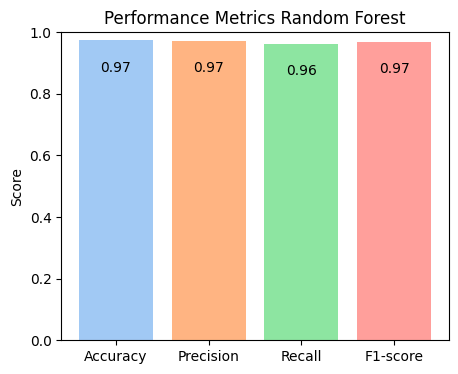

Accuracy: 0.973596004545498
Precision: 0.9731825980680189
Recall: 0.9622588891471067
F1-score: 0.9676899166832209


Classification Report:
 {'0': {'precision': 0.9738789165540758, 'recall': 0.9815039958501516, 'f1-score': 0.9776765890796941, 'support': 61689.0}, '1': {'precision': 0.9731825980680189, 'recall': 0.9622588891471067, 'f1-score': 0.9676899166832209, 'support': 43030.0}, 'accuracy': 0.973596004545498, 'macro avg': {'precision': 0.9735307573110473, 'recall': 0.9718814424986291, 'f1-score': 0.9726832528814575, 'support': 104719.0}, 'weighted avg': {'precision': 0.973592792885448, 'recall': 0.973596004545498, 'f1-score': 0.9735729735636919, 'support': 104719.0}}


{'accuracy': 0.973596004545498,
 'precision': 0.9731825980680189,
 'recall': 0.9622588891471067,
 'f1': 0.9676899166832209,
 'classification_report': {'0': {'precision': 0.9738789165540758,
   'recall': 0.9815039958501516,
   'f1-score': 0.9776765890796941,
   'support': 61689.0},
  '1': {'precision': 0.9731825980680189,
   'recall': 0.9622588891471067,
   'f1-score': 0.9676899166832209,
   'support': 43030.0},
  'accuracy': 0.973596004545498,
  'macro avg': {'precision': 0.9735307573110473,
   'recall': 0.9718814424986291,
   'f1-score': 0.9726832528814575,
   'support': 104719.0},
  'weighted avg': {'precision': 0.973592792885448,
   'recall': 0.973596004545498,
   'f1-score': 0.9735729735636919,
   'support': 104719.0}}}

In [12]:
import time
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
random_forest = RandomForestClassifier(n_estimators=150)
start_time = time.time()

# Train the model on the training data
random_forest.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")
# Predict on the testing data
y_pred = random_forest.predict(X_test)

evaluate_classification(y_test, y_pred, 'Random Forest')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was p

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 171752, number of negative: 247124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Li

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


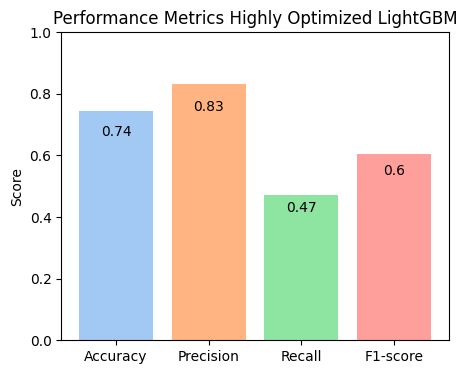

Accuracy: 0.7447359122986278
Precision: 0.833681365925562
Recall: 0.47318150127817804
F1-score: 0.6037092494032882


Classification Report:
 {'0': {'precision': 0.7176820763176248, 'recall': 0.9341535768127219, 'f1-score': 0.81173363383456, 'support': 61689.0}, '1': {'precision': 0.833681365925562, 'recall': 0.47318150127817804, 'f1-score': 0.6037092494032882, 'support': 43030.0}, 'accuracy': 0.7447359122986278, 'macro avg': {'precision': 0.7756817211215934, 'recall': 0.70366753904545, 'f1-score': 0.7077214416189241, 'support': 104719.0}, 'weighted avg': {'precision': 0.7653472510407366, 'recall': 0.7447359122986278, 'f1-score': 0.7262545014700642, 'support': 104719.0}}


{'accuracy': 0.7447359122986278,
 'precision': 0.833681365925562,
 'recall': 0.47318150127817804,
 'f1': 0.6037092494032882,
 'classification_report': {'0': {'precision': 0.7176820763176248,
   'recall': 0.9341535768127219,
   'f1-score': 0.81173363383456,
   'support': 61689.0},
  '1': {'precision': 0.833681365925562,
   'recall': 0.47318150127817804,
   'f1-score': 0.6037092494032882,
   'support': 43030.0},
  'accuracy': 0.7447359122986278,
  'macro avg': {'precision': 0.7756817211215934,
   'recall': 0.70366753904545,
   'f1-score': 0.7077214416189241,
   'support': 104719.0},
  'weighted avg': {'precision': 0.7653472510407366,
   'recall': 0.7447359122986278,
   'f1-score': 0.7262545014700642,
   'support': 104719.0}}}

In [13]:
import time
import lightgbm as lgb
# Create and train LightGBM model
lightgbm_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, num_leaves=100, max_depth=20, min_child_samples=10, boosting_type='gbdt', feature_fraction=0.8, bagging_fraction=0.8, bagging_freq=5, reg_alpha=0.1, reg_lambda=0.1)
start_time = time.time()
lightgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=True)]
)
end_time = time.time()
print(f"Highly Optimized LightGBM Training Time: {end_time - start_time} seconds")

# Predict on test data
y_pred_lgb = lightgbm_model.predict(X_test)

# Evaluate the highly optimized LightGBM model
evaluate_classification(y_test, y_pred_lgb, 'Highly Optimized LightGBM')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Training Time: 0.4249610900878906 seconds


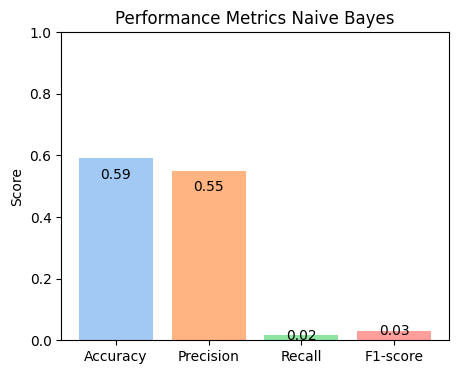

Accuracy: 0.5902844755965966
Precision: 0.5490196078431373
Recall: 0.016267720195212644
F1-score: 0.03159914230899447


Classification Report:
 {'0': {'precision': 0.5907930861142261, 'recall': 0.9906790513705848, 'f1-score': 0.7401791283389753, 'support': 61689.0}, '1': {'precision': 0.5490196078431373, 'recall': 0.016267720195212644, 'f1-score': 0.03159914230899447, 'support': 43030.0}, 'accuracy': 0.5902844755965966, 'macro avg': {'precision': 0.5699063469786817, 'recall': 0.5034733857828987, 'f1-score': 0.3858891353239849, 'support': 104719.0}, 'weighted avg': {'precision': 0.5736279797819946, 'recall': 0.5902844755965966, 'f1-score': 0.4490170966267733, 'support': 104719.0}}


{'accuracy': 0.5902844755965966,
 'precision': 0.5490196078431373,
 'recall': 0.016267720195212644,
 'f1': 0.03159914230899447,
 'classification_report': {'0': {'precision': 0.5907930861142261,
   'recall': 0.9906790513705848,
   'f1-score': 0.7401791283389753,
   'support': 61689.0},
  '1': {'precision': 0.5490196078431373,
   'recall': 0.016267720195212644,
   'f1-score': 0.03159914230899447,
   'support': 43030.0},
  'accuracy': 0.5902844755965966,
  'macro avg': {'precision': 0.5699063469786817,
   'recall': 0.5034733857828987,
   'f1-score': 0.3858891353239849,
   'support': 104719.0},
  'weighted avg': {'precision': 0.5736279797819946,
   'recall': 0.5902844755965966,
   'f1-score': 0.4490170966267733,
   'support': 104719.0}}}

In [14]:
import time
from sklearn.naive_bayes import GaussianNB

# Create and train Naive Bayes model
naive_bayes = GaussianNB()
start_time = time.time()
naive_bayes.fit(X_train, y_train)
end_time = time.time()
print(f"Naive Bayes Training Time: {end_time - start_time} seconds")

# Predict on test data
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the Naive Bayes model
evaluate_classification(y_test, y_pred_nb, 'Naive Bayes')

KNN Training Time: 0.06 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


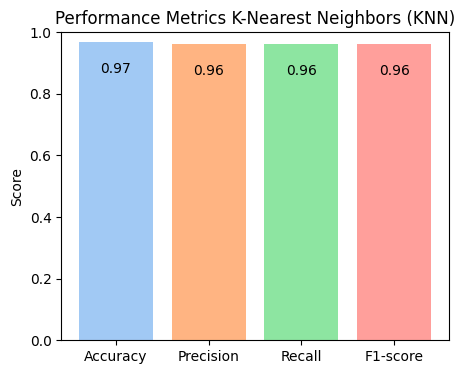

Accuracy: 0.9688213218231648
Precision: 0.9616858237547893
Recall: 0.9624680455496165
F1-score: 0.9620767756547999


Classification Report:
 {'0': {'precision': 0.9738054303046031, 'recall': 0.9732529300199387, 'f1-score': 0.9735291017731043, 'support': 61689.0}, '1': {'precision': 0.9616858237547893, 'recall': 0.9624680455496165, 'f1-score': 0.9620767756547999, 'support': 43030.0}, 'accuracy': 0.9688213218231648, 'macro avg': {'precision': 0.9677456270296962, 'recall': 0.9678604877847776, 'f1-score': 0.9678029387139521, 'support': 104719.0}, 'weighted avg': {'precision': 0.9688253725324845, 'recall': 0.9688213218231648, 'f1-score': 0.9688232356659926, 'support': 104719.0}}


{'accuracy': 0.9688213218231648,
 'precision': 0.9616858237547893,
 'recall': 0.9624680455496165,
 'f1': 0.9620767756547999,
 'classification_report': {'0': {'precision': 0.9738054303046031,
   'recall': 0.9732529300199387,
   'f1-score': 0.9735291017731043,
   'support': 61689.0},
  '1': {'precision': 0.9616858237547893,
   'recall': 0.9624680455496165,
   'f1-score': 0.9620767756547999,
   'support': 43030.0},
  'accuracy': 0.9688213218231648,
  'macro avg': {'precision': 0.9677456270296962,
   'recall': 0.9678604877847776,
   'f1-score': 0.9678029387139521,
   'support': 104719.0},
  'weighted avg': {'precision': 0.9688253725324845,
   'recall': 0.9688213218231648,
   'f1-score': 0.9688232356659926,
   'support': 104719.0}}}

In [15]:
import time
from sklearn.neighbors import KNeighborsClassifier
# Train and evaluate K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
start_time = time.time()
knn_model.fit(X_train, y_train)
end_time = time.time()
print(f"KNN Training Time: {end_time - start_time:.2f} seconds")
y_pred_knn = knn_model.predict(X_test)
evaluate_classification(y_test, y_pred_knn, 'K-Nearest Neighbors (KNN)')